In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fatiando.gravmag import ellipsoid_triaxial
from fatiando import mesher, gridder, utils

%matplotlib inline

C:\Users\diego_000\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import ellipsoid_triaxial_func as me2

In [3]:
# Geogrphic coordinates grid
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 90., 0.

#xc position x; yc position y; and zc depth
xc = 0.
yc = 0.
zc = 100.

#Remanent vector
intensity_rem = 10000.
incli_rem = 90.
decli_rem = 0.

#susceptibility directions
intensidadeA = 0.2
intensidadeB = 0.1
intensidadeC = 0.05
k = [intensidadeA,intensidadeB,intensidadeC,0.0,90.0,90.0]

azimuth = 0.
delta = 0.
gamma = 0.

daxis = 20.
aref = 50.

# Implementation  -  Clark's Ellipsoid Triaxial Function

In [4]:
# ellipsoid axis
a = aref + daxis
b = aref
c = aref - 0.01

Bx_T, By_T, Bz_T,Tf_T = me2.ellipsoid (Xp,Yp,Zp,xc,yc,zc,a,b,c,azimuth,delta,gamma,decli_rem,incli_rem,intensity_rem,dec,inc,inten,k)

[ 0.55715016  0.56975964  0.58263902 ..., -0.58263902 -0.56975964
 -0.55715016]


# Implementation  -  Clark's Ellipsoid Triaxial FAT

In [5]:
model = [mesher.EllipsoidTriaxial(xc,yc,zc,a,b,c,azimuth,delta,gamma, 
                                 {'remanence': [intensity_rem, incli_rem, decli_rem],
                                  'k': [intensidadeA, intensidadeB, intensidadeC, 0., 90., 90.]})]

Bx = ellipsoid_triaxial.bx_c(Xp,Yp,Zp,inten,inc,dec,model)
By = ellipsoid_triaxial.by_c(Xp,Yp,Zp,inten,inc,dec,model)
Bz = ellipsoid_triaxial.bz_c(Xp,Yp,Zp,inten,inc,dec,model)
Tf = ellipsoid_triaxial.tf_c(Xp,Yp,Zp,inten,inc,dec,model)

[ 0.55715016  0.56975964  0.58263902 ..., -0.58263902 -0.56975964
 -0.55715016]
[ 0.55715016  0.56975964  0.58263902 ..., -0.58263902 -0.56975964
 -0.55715016]
[ 0.55715016  0.56975964  0.58263902 ..., -0.58263902 -0.56975964
 -0.55715016]
[ 0.55715016  0.56975964  0.58263902 ..., -0.58263902 -0.56975964
 -0.55715016]


## Results

### Plot Bx

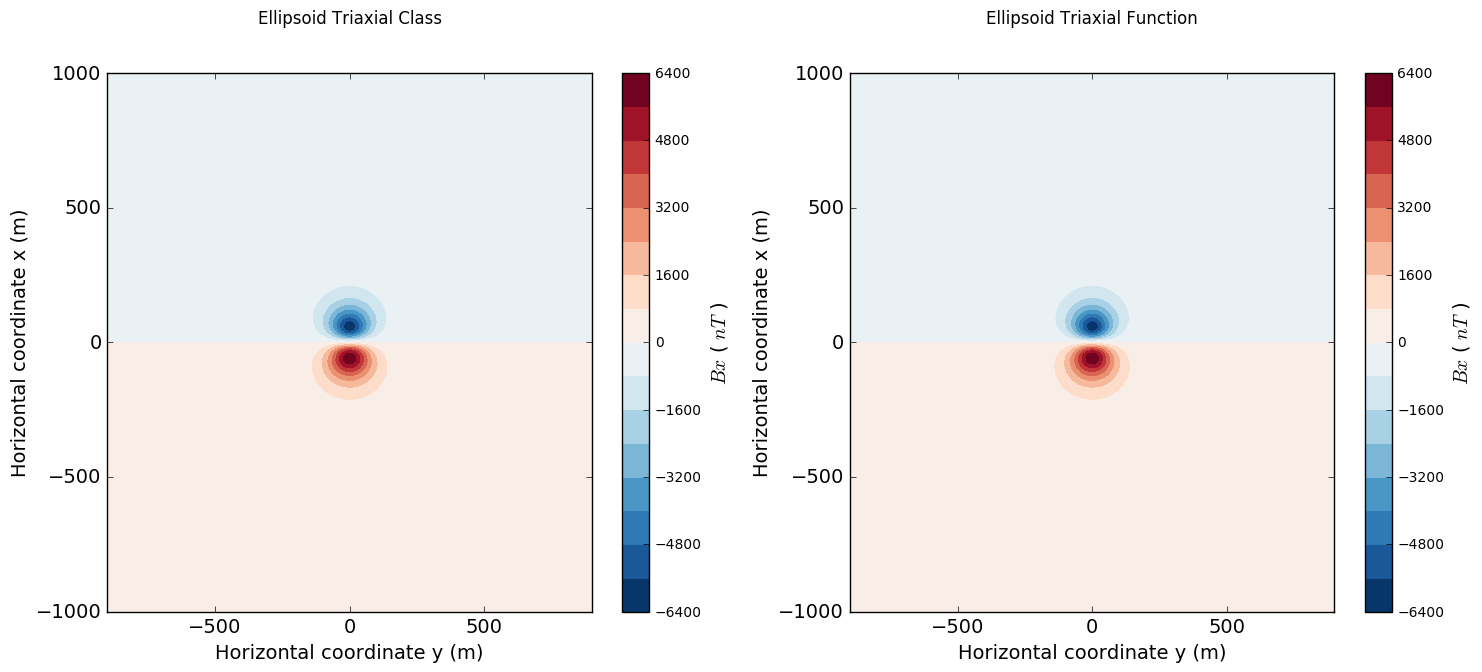

In [6]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx_T), np.min(Bx_T)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Triaxial Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx_T,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot By

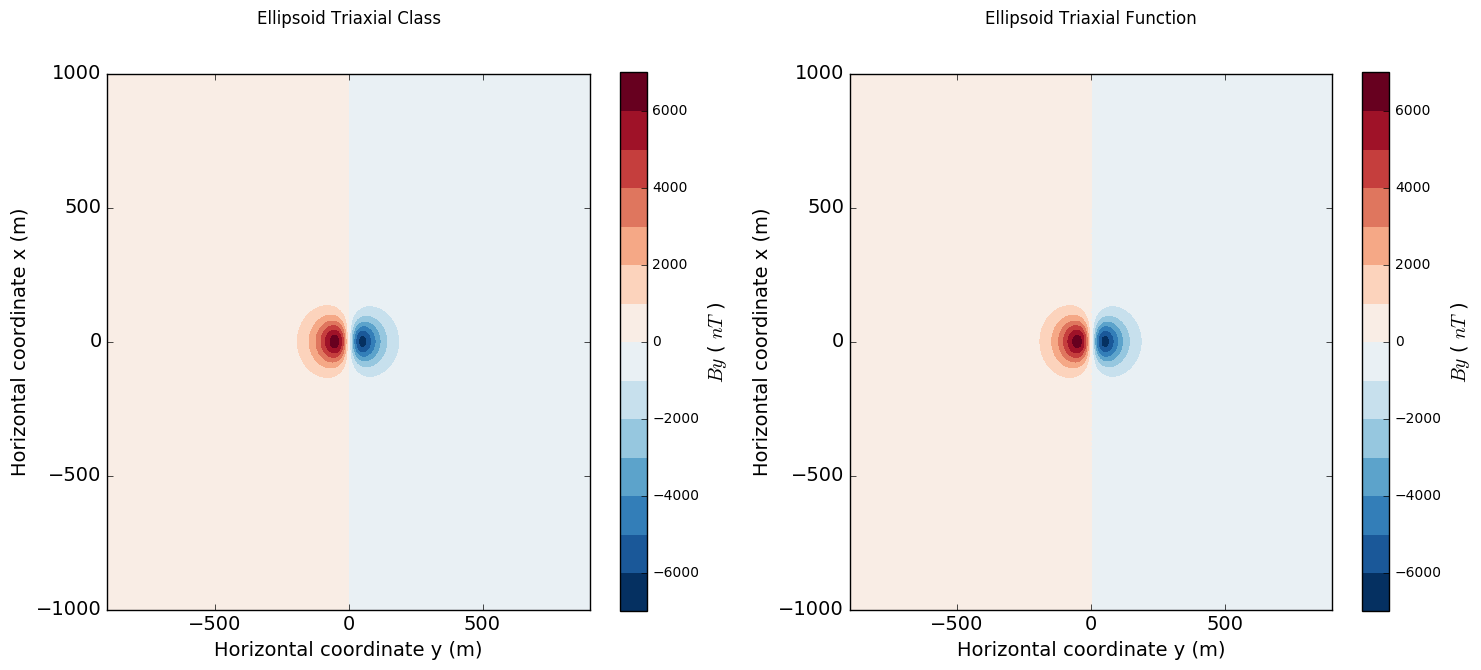

In [7]:
rangesBy = np.max(np.abs([np.max(By), np.min(By),
                          np.max(By_T), np.min(By_T)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$By$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Triaxial Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,By_T,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$By$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Bz

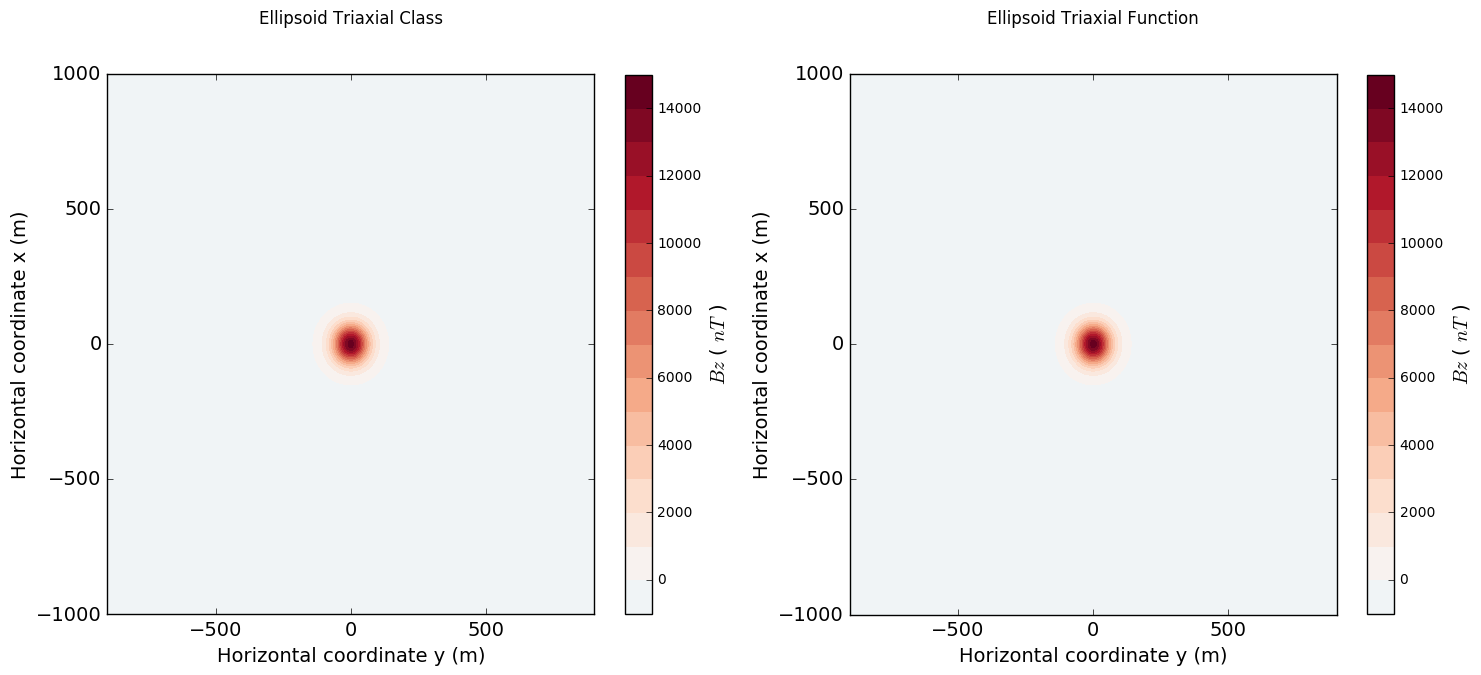

In [8]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz_T), np.min(Bz_T)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Triaxial Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz_T,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Tf

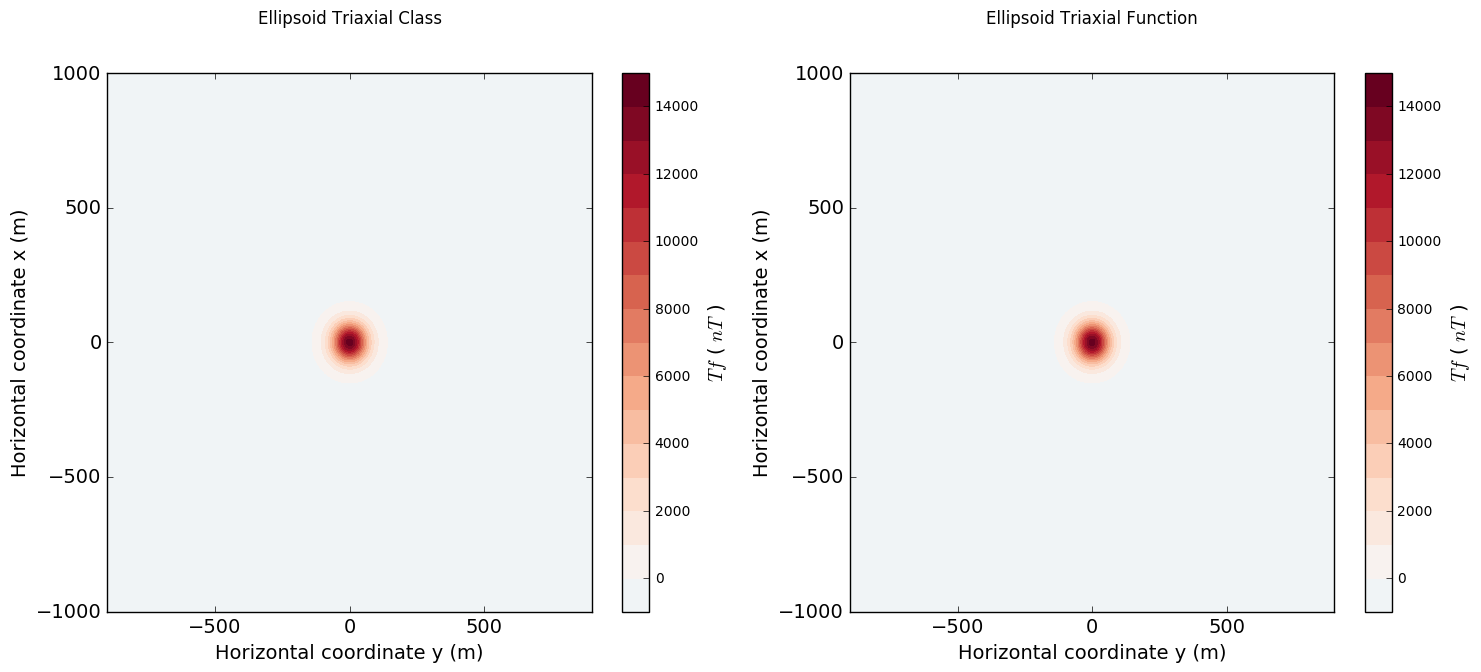

In [9]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf_T), np.min(Tf_T)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Ellipsoid Triaxial Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf_T,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()